In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib.animation import FuncAnimation
from RegressionPipeline import RegressionPipeline

In [2]:
@jit
def func_16(B, x):
    if len(B) != 3:
        assert "B must have 3 elements"
    k1 = B[0]/B[1]
    k2 = np.exp(-0.5 * ((x-B[2])/B[1])**2)
    y =k1*k2
    return y
bounds_16 = np.array([[1, 10], [1, 10], [100, 1000]])

In [3]:
@jit
def func_4(B, x):
    if len(B) != 7:
        assert "B must have 7 elements"
    sum1 = B[0] * np.exp(-B[1]*x)
    sum2 = B[2] * np.exp(-((x-B[3])/B[4])**2)
    sum3 = B[5] * np.exp(-((x-B[6])/B[4])**2)
    y = sum1 + sum2 + sum3
    return y
bounds_4 = np.array([[10, 100], [0, 1], [100, 200], [10, 100], [10, 100], [10, 100], [100, 200]])

In [4]:
@jit
def func_11(B, x):
    if len(B) != 2:
        assert "B must have 3 elements"
    numerator = B[0] * B[1] * x
    denominator = 1 + B[1] * x
    y = numerator / denominator
    return y
bounds_11 = np.array([[100, 1000], [0, 1]])

In [5]:
data16 = pd.read_excel('DataRegression.xlsx', sheet_name='Var16')
data4 = pd.read_excel('DataRegression.xlsx', sheet_name='Var04')
data11 = pd.read_excel('DataRegression.xlsx', sheet_name='Var11')

In [6]:
x_data = data16['x'].values
y_data = data16['y'].values
pipeline = RegressionPipeline(func_16, bounds_16, x_data, y_data)
pipeline.train(method='DE', pop_size=50, max_iter=200)
pipeline.train(method='PSO', num_particles=50, max_iter=200)


In [7]:
pipeline.get_best_params('DE')

array([  1.580335  ,   4.17395661, 451.63284375])

In [8]:
pipeline.get_best_params('PSO')

array([  1.56180907,   4.05264348, 451.54753614])

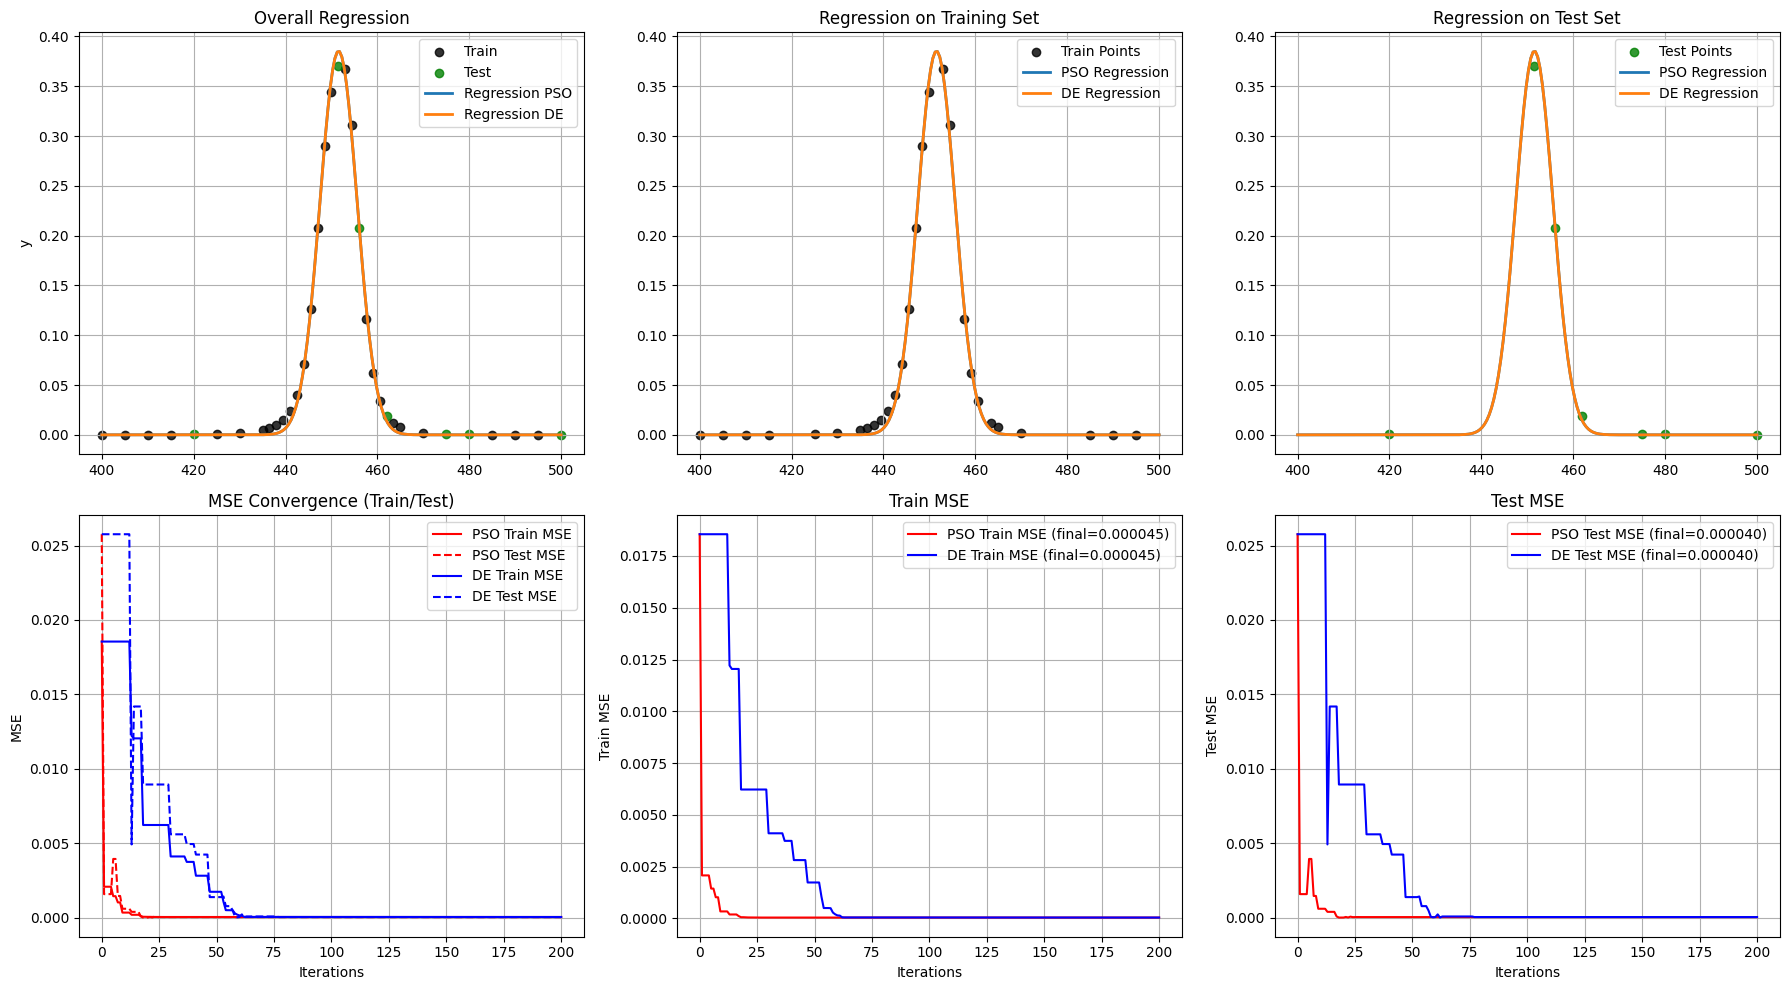

In [9]:
pipeline.plot_results()

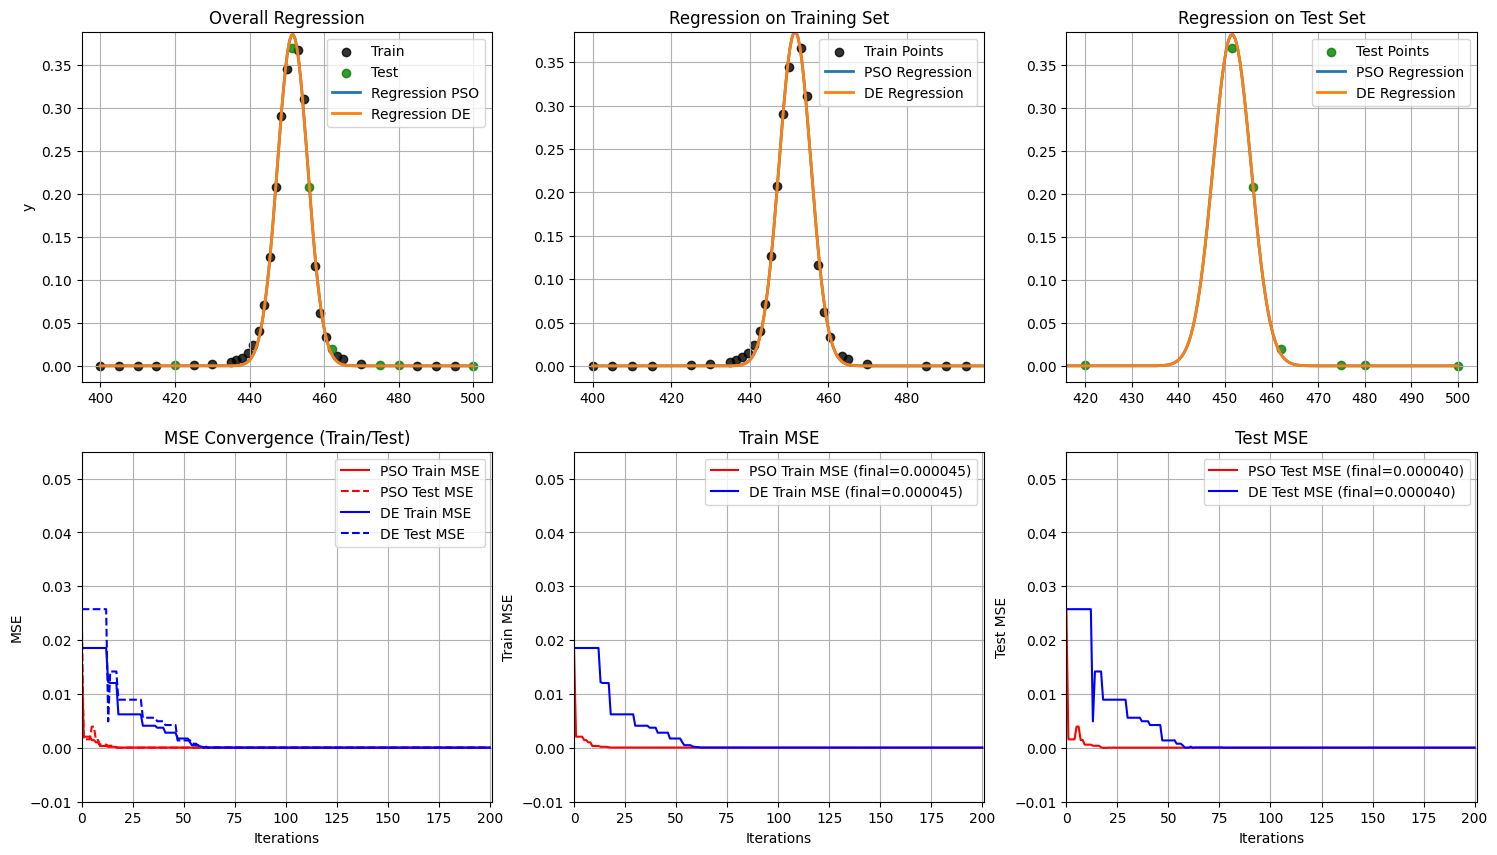

In [10]:
pipeline.create_animation(save_path='gifs/var16.gif', interval=50)

In [7]:
x_data = data4['x'].values
y_data = data4['y'].values
pipeline = RegressionPipeline(func_4, bounds_4, x_data, y_data)
pipeline.train(method='DE', pop_size=50, max_iter=200)
pipeline.train(method='PSO', num_particles=50, max_iter=200)
print(pipeline.get_best_params('DE'))
print(pipeline.get_best_params('PSO'))

[1.00000000e+02 1.07744037e-02 1.04282418e+02 6.76780101e+01
 2.17329556e+01 6.70796066e+01 1.78902803e+02]
[1.00000000e+02 1.07745489e-02 1.04284391e+02 6.76781904e+01
 2.17332753e+01 6.70806401e+01 1.78902803e+02]


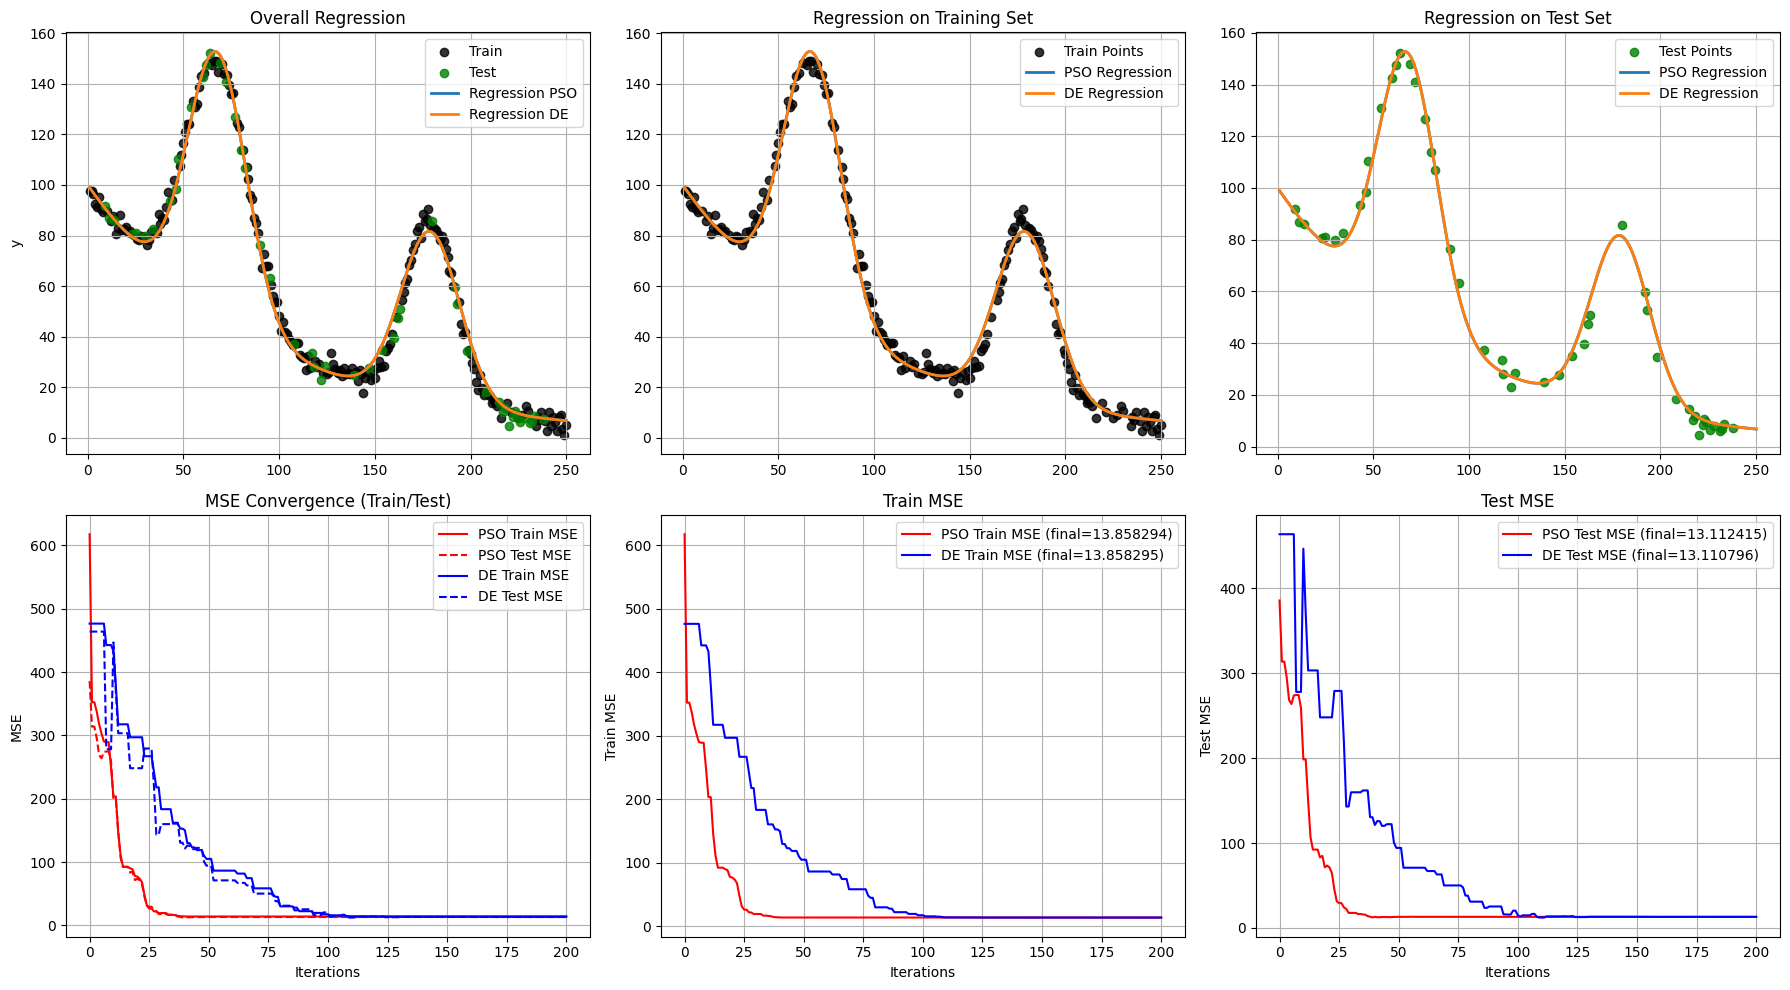

In [8]:
pipeline.plot_results()

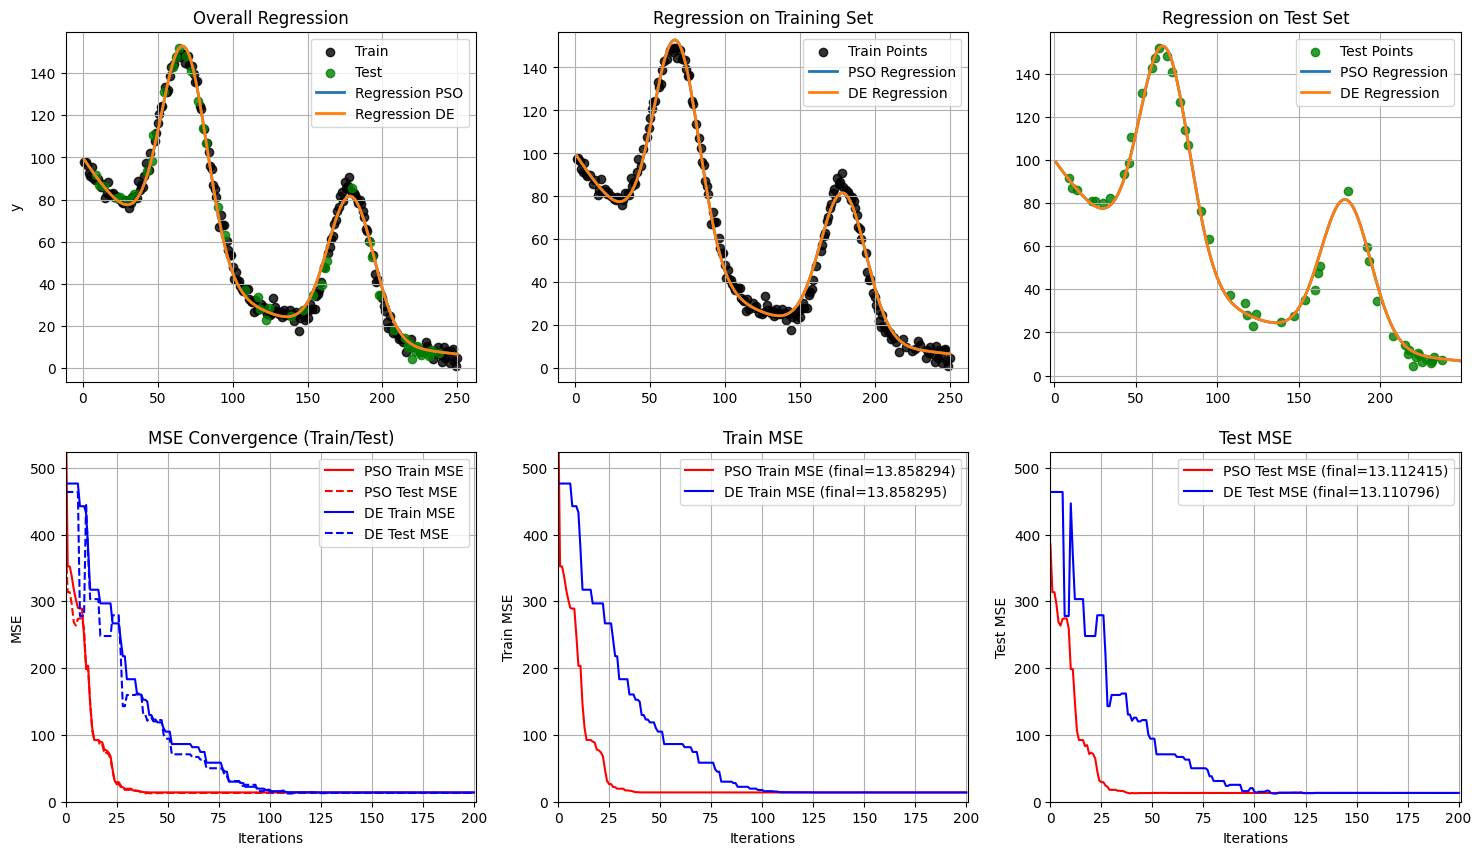

In [9]:
pipeline.create_animation(save_path='gifs/var4.gif', interval=50)

In [14]:
x_data = data11['x'].values
y_data = data11['y'].values
pipeline = RegressionPipeline(func_11, bounds_11, x_data, y_data)
pipeline.train(method='DE', pop_size=50, max_iter=100)
pipeline.train(method='PSO', num_particles=50, max_iter=100)

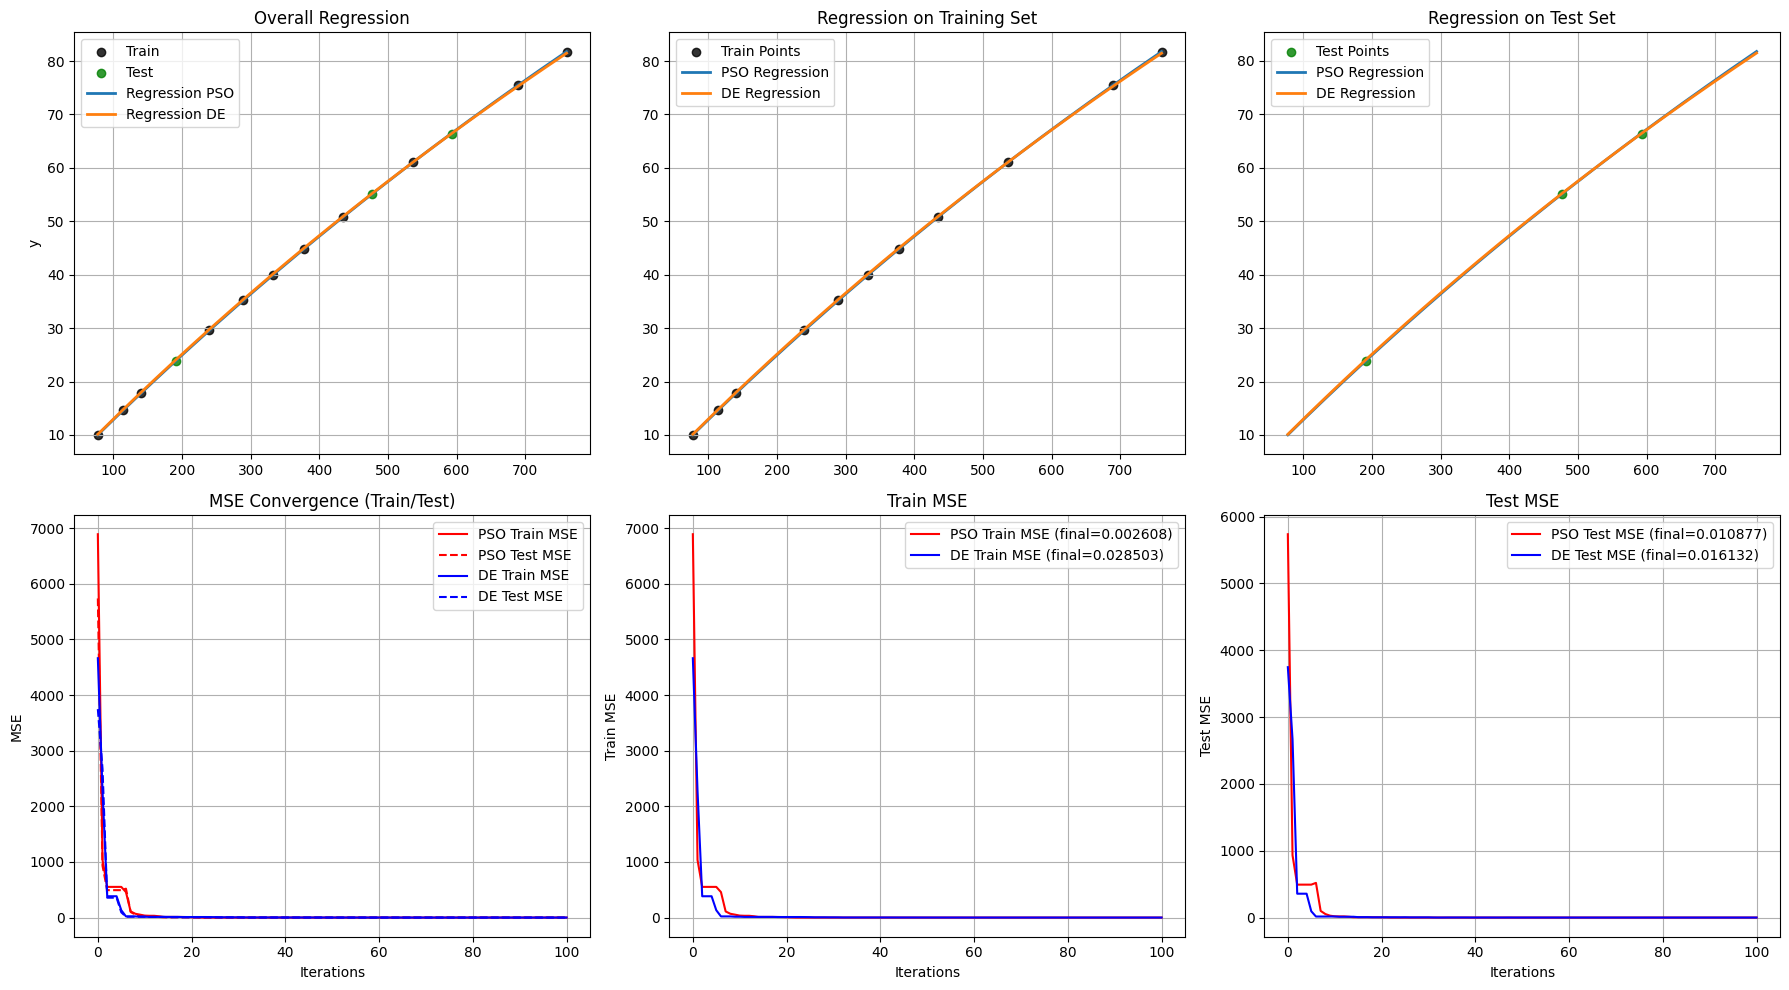

In [15]:
pipeline.plot_results()

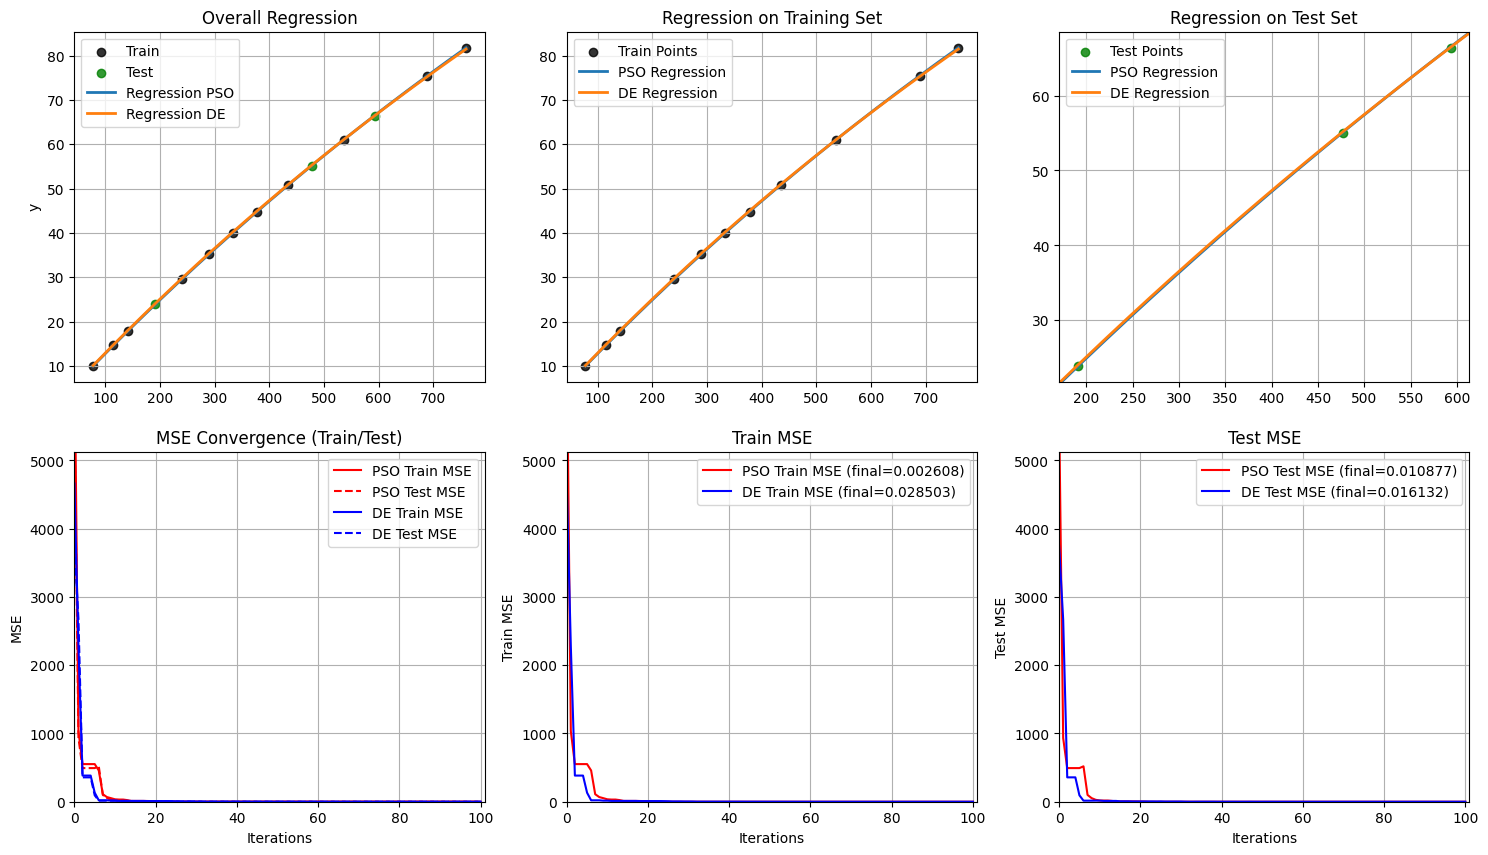

In [16]:
pipeline.create_animation(save_path='gifs/var11.gif', interval=50)